In [1]:
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
import requests

from wordcloud import WordCloud

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Link do site
Site = 'https://news.google.com/search?q=americanas&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'

Pagina = requests.get(Site)

In [3]:
#Transforma todo o html em texto
Coleta = BeautifulSoup(Pagina.text, 'html.parser')

In [4]:
#Buscar
Coleta.title.string

'Google Notícias - Pesquisar'

In [5]:
Coleta.find(class_='oOr8M').string

'Americanas paga à vista fabricantes para garantir Páscoa'

In [6]:
len(Coleta.find_all('div'))

1375

In [7]:
def Buscar_Empresas(ticket):
    #criar url
    Url = f'https://news.google.com/search?q={ticket}&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'
    Resposta = requests.get(Url)

    #Codigo -> SOAP
    Codigo_html = Resposta.text

    #converter para soup
    Objeto_Soup = BeautifulSoup(Codigo_html, 'html.parser')
    return Objeto_Soup

In [8]:
#Informações
Dados = Buscar_Empresas('Americanas')

len(Dados)
#Buscando titulos
Elementos = Dados.find_all('h3')

In [9]:
#get_text busca os testos
Noticias = [Texto.get_text() for Texto in Elementos]
print('Noticias')
print(len(Noticias))

Noticias
104


In [10]:
print('***' * 7)
print('*** Noticias localizadas ***')
print('***' * 7)

for Numero, Loop in enumerate(Noticias[0:5]):
    print('--' * 10)
    print(Loop)

*********************
*** Noticias localizadas ***
*********************
--------------------
Americanas: o que a varejista pode vender na recuperação judicial para sair da crise
--------------------
Americanas vai vender ovos de Páscoa neste ano? Decisão da empresa surpreende muita gente
--------------------
Carnaval ainda não chegou, mas Americanas (AMER3) já paga a conta da Páscoa
--------------------
Americanas paga à vista para ter 'maior Páscoa do mundo'
--------------------
Após balanço financeiro, BB diz que vai recuperar ativos da Lojas Americanas


In [11]:
Concatenar = ''
for Loop in Noticias:
    #split quebra cada espaço q existe
    Quebra = Loop.split()
    for Palavra in Quebra:
        Concatenar = Concatenar + ' '+ Palavra

In [ ]:
#Criando a nuvem
Nuvem_Palavras = WordCloud(
    width=1200,
    height = 1000).generate(Concatenar)
Figura, Eixo = plt.subplots(figsize=(12,10))
Eixo.imshow(Nuvem_Palavras, interpolation='bilinear')

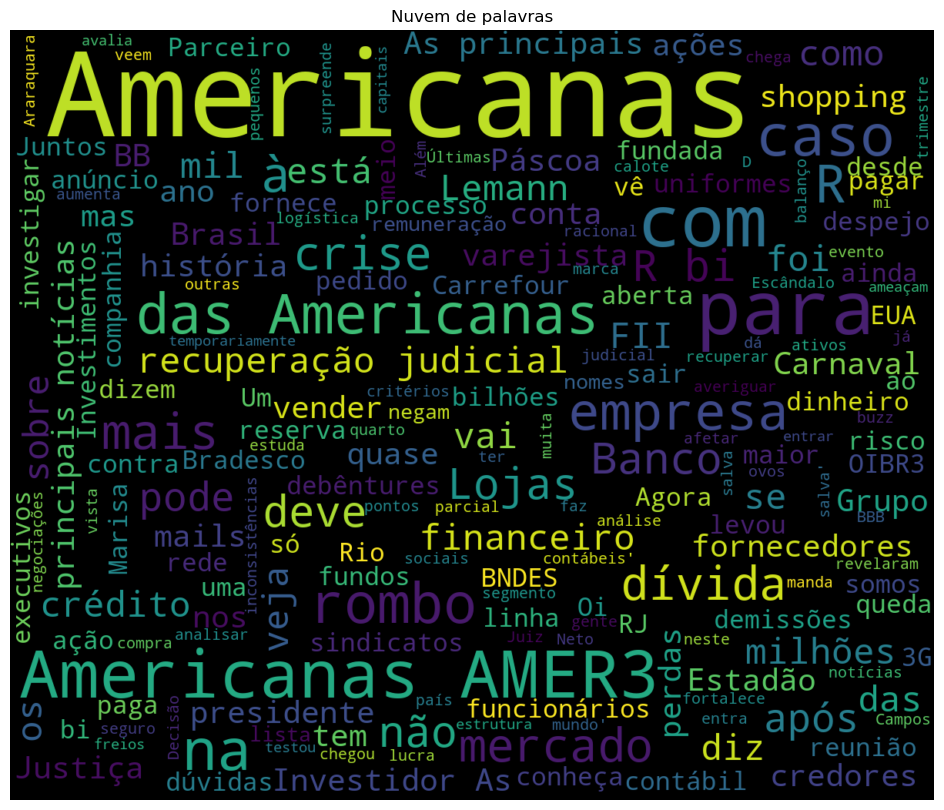

In [13]:
Nuvem_Palavras = WordCloud(
    width=1200,
    height = 1000,
    #tira as palaras da tabela
    stopwords=[f'{Dados}','o', 'de', 'que', 'da','e','por', 'até', 'do', 'a', 'em', 'no', 'dos', 'é', 'ser']
    ).generate(Concatenar)
Figura, Eixo = plt.subplots(figsize=(12,10))
plt.title(f'Nuvem de palavras')
Eixo.imshow(Nuvem_Palavras, interpolation='bilinear')
Eixo.set_axis_off()